# Regresión lineal y polinomial con Boston Housing dataset


1. Entra en Kaggle.com y busca por el dataset boston-housing. Acepta las reglas y descárgate el dataset. Carga en Python, a través de pandas, el csv llamado “train” y realiza un head para comprobar que has cargado correctamente los datos.


In [27]:
import seaborn as sns

In [28]:
import pandas as pd
import numpy as np 


#Cargo el fichero
boston = pd.read_csv("BostonHousing.csv", delimiter = ',')
boston.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


2. Dentro del Kaggle de Boston Housing, en la vista general se encuentra la descripción de las distintas variables contenidas en el dataset. La variable objetivo a predecir es medv.

    a. Haz un histograma de la variable objetivo con la función hist. \
    b. Ahora haz un histograma de la variable objetivo mediante la función distplot de la librería seaborn. ¿Qué crees que representa la línea azul?\
    c.Verifica que no hay ningún missing en ninguna de las variables del dataset. \
    d.Haz un scatter con cada una de las variables age, dis, lstat y rm con la variable a predecir medv. Entiende las variables e interpreta los gráficos. Si estimamos un modelo de regresión lineal con estas 4 variables:
        i. ¿qué signo esperas para cada uno de los coeficientes de estas variables? 
        ii. ¿tiene sentido el signo esperado teniendo en cuenta la relación económica entre la variable y la variable objetivo?


In [29]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


(array([ 2.,  0.,  4.,  4.,  3.,  2.,  6.,  7.,  6., 13., 10.,  9., 11.,
         9., 12., 20., 25., 16., 19., 21., 27., 19.,  9.,  3.,  4.,  8.,
         4.,  3.,  5.,  5.,  6.,  4.,  1.,  6.,  4.,  3.,  2.,  0.,  1.,
         0.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  3., 11.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <BarContainer object of 50 artists>)

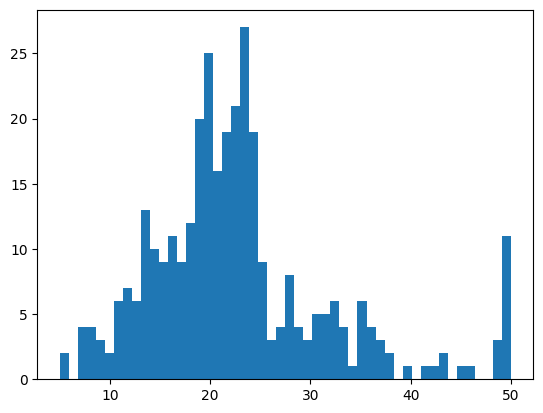

In [30]:
#2a. Haz el histograma
import matplotlib.pyplot as plt 
plt.hist(boston['medv'], bins=50)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_7220\755440485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['medv'], bins=30)


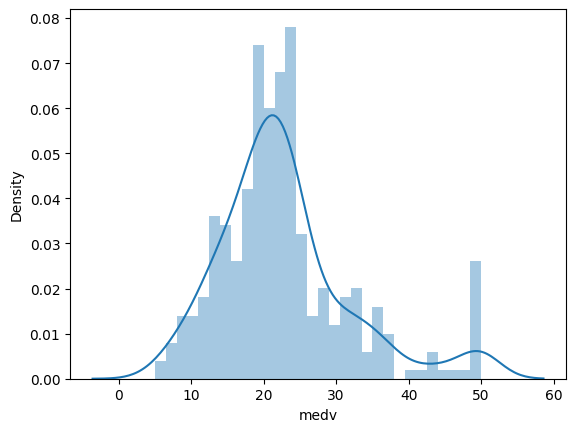

In [31]:
#2b. Haz el histograma con seaborn. Nos dibuja la función de densidad ajustada.
import seaborn as sns 
sns.distplot(boston['medv'], bins=30)
plt.show()

In [32]:
#2c. verifica que no hay ningun missing
boston.isnull().sum()


ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

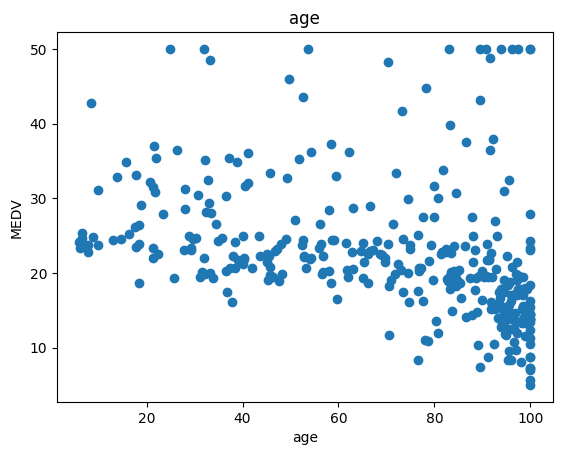

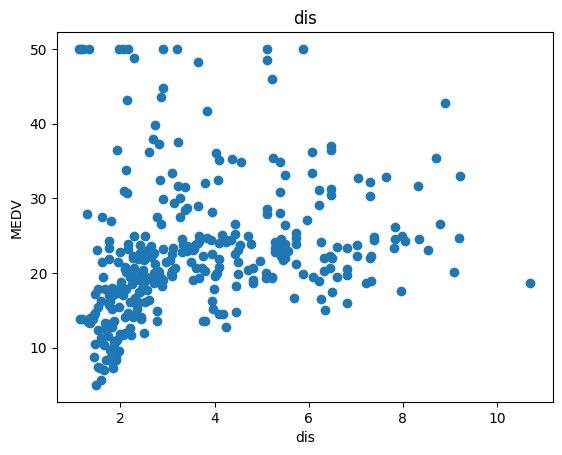

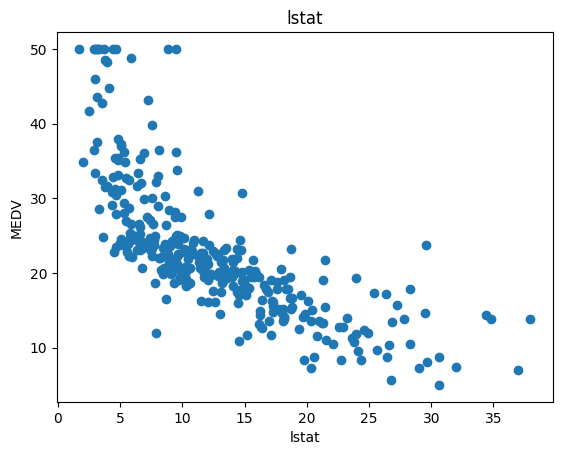

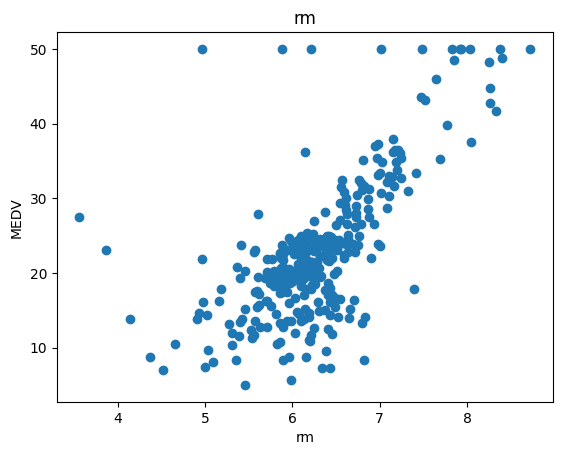

In [33]:
#2d. plot features
features = ['age', 'dis', 'lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [34]:
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's


In [35]:
# age: tendencia decreciente (negativa)/ tiene sentido cuanta mas proporcion de viviendas viejas menor precio
# dis: tendencia creciente (positiva) / tiene sentido? es posible que los centros de employements sean fabricas, y entonces sean zonas industriales
# lstat: tendencia deccreciente / tiene sentido. cuanto más clase baja => más barrio marginal => menos precio
# rm: tendencia creciente / tiene sentido. Cuantas mas habitaciones mas precio

3. Estima 4 regresiones lineales simples distintas, una para cada una de las 4 variables anteriores.

    a. Obtén el coeficiente de la pendiente de cada recta y grafica la recta de ajuste junto a la nube de puntos. ¿Coincide el signo con lo que esperabas en el apartado d anterior?\
    b. ¿Cuál de los 4 modelos obtiene mejor MSE? ¿Cuál obtiene mejor R2?


In [36]:
target

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [37]:
#3
# Hecho sin train test split!!!!!!!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lin1 = LinearRegression()
lin2 = LinearRegression()
lin3 = LinearRegression()
lin4 = LinearRegression()

Y = boston['medv']
#Y = target
X1 = boston[[features[0]]]
X2 = boston[[features[1]]]
X3 = boston[[features[2]]]
X4 = boston[[features[3]]]
lin1 = lin1.fit(X1, Y)
lin2 = lin2.fit(X2, Y)
lin3 = lin3.fit(X3, Y)
lin4 = lin4.fit(X4, Y)
Y_pred1 = lin1.predict(X1) 
Y_pred2 = lin2.predict(X2)
Y_pred3 = lin3.predict(X3)
Y_pred4 = lin4.predict(X4)


[-0.11702307]


Text(0.5, 1.0, 'age')

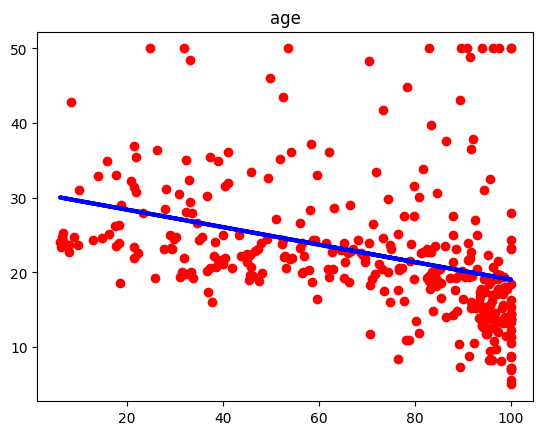

In [38]:
#3a
print(lin1.coef_) #negativo, coincide con el esperado
plt.scatter(X1, Y,  color='red')
plt.plot(X1, Y_pred1, "b-", linewidth=3)
plt.title("age")
# age

<Axes: xlabel='age', ylabel='medv'>

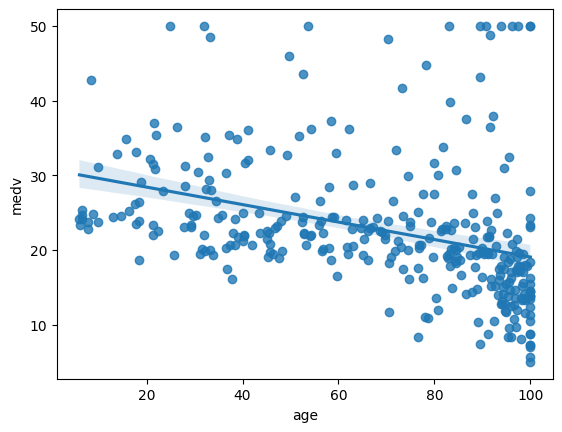

In [39]:
sns.regplot(x=X1,y=Y)

[1.15493442]


Text(0.5, 1.0, 'dis')

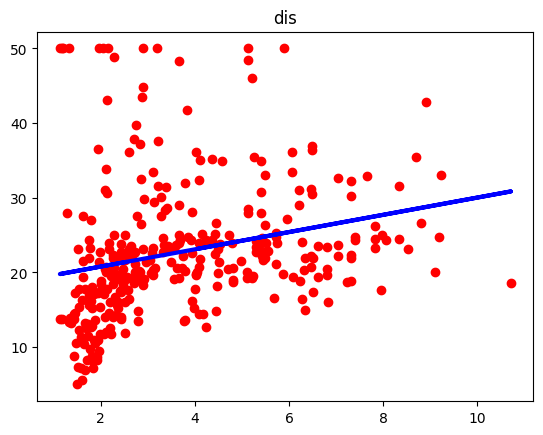

In [40]:
print(lin2.coef_) #negativo, coincide con el esperado
plt.scatter(X2, Y,  color='red')
plt.plot(X2, Y_pred2, "b-", linewidth=3)
plt.title("dis")

[-0.9586494]


Text(0.5, 1.0, 'lstat')

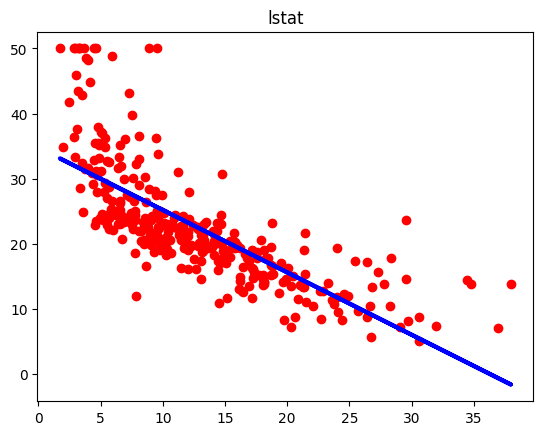

In [41]:
print(lin3.coef_) #negativo, coincide con el esperado
plt.scatter(X3, Y,  color='red')
plt.plot(X3, Y_pred3, "b-", linewidth=3)
plt.title("lstat")

[8.98642214] -33.53672508960527


Text(0.5, 1.0, 'rm')

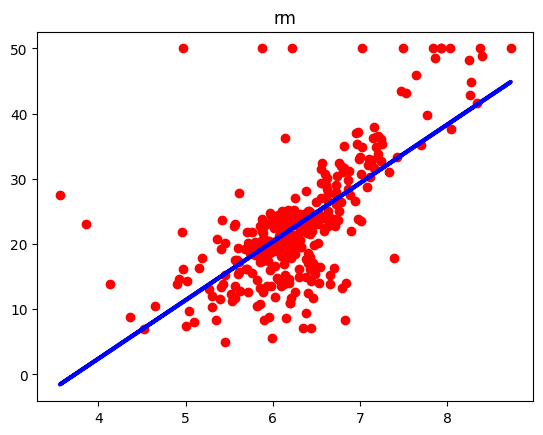

In [42]:
print(lin4.coef_, lin4.intercept_) #negativo, coincide con el esperado
plt.scatter(X4, Y,  color='red')
plt.plot(X4, Y_pred4, "b-", linewidth=3)
plt.title("rm")

In [43]:
#3b
print('Modelo 1, MSE:', mean_squared_error(Y, Y_pred1), 'R2:', r2_score(Y, Y_pred1) )
print('Modelo 2, MSE:', mean_squared_error(Y, Y_pred2), 'R2:', r2_score(Y, Y_pred2) )
print('Modelo 3, MSE:', mean_squared_error(Y, Y_pred3), 'R2:', r2_score(Y, Y_pred3) )    #lstat 38! MEJOR MSE
print('Modelo 4, MSE:', mean_squared_error(Y, Y_pred4), 'R2:', r2_score(Y, Y_pred4) )   #rm 44 

Modelo 1, MSE: 73.0934439023321 R2: 0.12880079325913063
Modelo 2, MSE: 78.68027533932558 R2: 0.06221146792090593
Modelo 3, MSE: 38.12994358928325 R2: 0.5455300115227188
Modelo 4, MSE: 44.00162841002105 R2: 0.4755455247485779


4. Ahora estima una regresión incorporando solamente las variables lstat y rm.

    a. Obtén los coeficientes de cada variable. ¿Siguen presentando el mismo signo que por separado?\
    b. ¿El nuevo modelo presenta mejor MSE y mejor R2?\
    c. Gráfica la variable objetivo contra la predicción y analiza el gráfico.\
    d. ¿Cual es el efecto marginal de cada variable?


In [44]:
from sklearn.model_selection import train_test_split

X = boston[features[2:4]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lin = LinearRegression()
lin = lin.fit(X_train, y_train)
y_pred = lin.predict(X_test) 

#4a
lin.coef_ 
#el signo es igual que antes, pero se han hecho menos intensos los betas (más pequeños en valor absoluto)

array([-0.64182206,  4.49915281])

In [45]:
#4b 
print(mean_squared_error(y_test, y_pred)) 
print(r2_score(y_test, y_pred))  
#mejoramos MSE y R2

40.41479616690029
0.6077077800379465


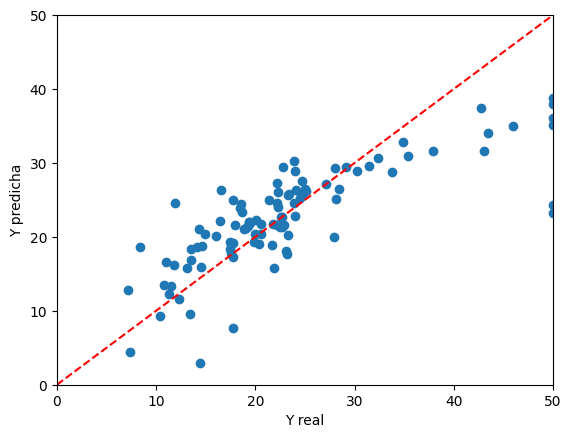

In [46]:
#4c
plt.scatter(y_test, y_pred)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("Y real")
plt.ylabel("Y predicha")
plt.plot([0,50],[0,50], "r--")
#tiene un poco de curvatura, seguramente un ajuste cuadrático irá mejor. 
#curioso los Y = 50, podrían ser outliers!
# En los valores pequeños mi prediccion falla por debajo(prediccion mas pequeña que lo real)
# En los valores grandes mi prediccion tambien es mas pequeña

# ESTE GRAFICO NO SE PEDÍA

Text(0, 0.5, 'Error')

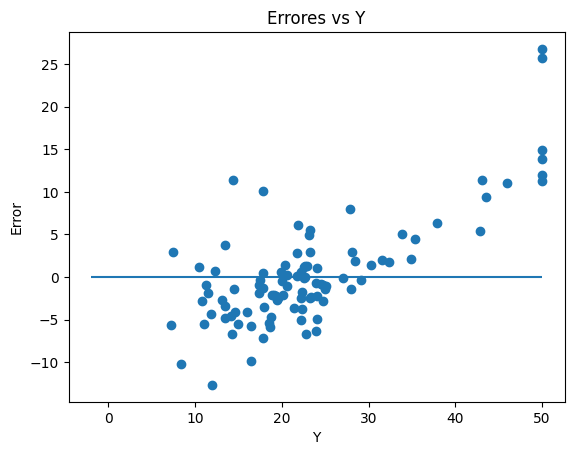

In [47]:
error=y_test-y_pred
plt.scatter(y_test, error)
plt.hlines(0,-2,50)
plt.title("Errores vs Y")
plt.xlabel("Y")
plt.ylabel("Error")

5. Ahora estima una regresión incorporando solamente las variables lstat, rm y age.

    a. Obtén los coeficientes de cada variable. ¿Siguen presentando el mismo signo que por separado?\
    b. ¿El nuevo modelo presenta mejor MSE y mejor R2 que el anterior?\
    c. ¿Qué conclusión sacas de incorporar la variable age?



In [48]:
features

['age', 'dis', 'lstat', 'rm']

In [49]:
lin = LinearRegression()
X = boston[list(features[i] for i in [0, 2, 3])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lin = LinearRegression()
lin = lin.fit(X_train, y_train)
y_pred = lin.predict(X_test) 

#5a
print(lin.coef_ )
#el signo de age es positivo, los otros dos siguen igual otra vez


[ 0.0318549  -0.8093658   4.52185647]


In [50]:
#5b 
print(mean_squared_error(y_test, y_pred)) 
print(r2_score(y_test, y_pred)) 
#mejoramos MSE y R2 respecto antes, pero poquito

21.553484156922142
0.6040263994917707


6. Ahora estima una regresión polinomial de orden 2, solamente incorporando las variables lstat y rm.

    a. Obtén los 6 coeficientes del polinomio. Identifica cada coeficiente con el término del polinomio al que pertenece: lstat, lstat^2, lstat*rm…\
    b. ¿El nuevo modelo presenta mejor MSE y mejor R2 que el anterior?\
    c. Gráfica la variable objetivo contra la predicción y analiza el gráfico. Compara este gráfico con el del apartado 4c.




In [55]:
# =============================================================================
# Ejercicio 6
# =============================================================================
#  HECHO SIN TRAIN_TEST_SPLIT

X = boston[ ["lstat","rm"]]
# from sklearn.preprocessing import PolynomialFeatures
# polynomial_features= PolynomialFeatures(degree=2) # aun no lo habéis visto
# X_poly = polynomial_features.fit_transform(X)
# X=X_poly
X["lstat2"]=X["lstat"]**2
X["rm2"]=X["rm"]**2
X["rm*lstat"]=X["rm"]*X["lstat"]

lin_pol = LinearRegression()
lin_pol = lin_pol.fit(X, Y)
Y_pred = lin_pol.predict(X)

#6a: 

print(lin_pol.coef_) #['lstat', 'rm', 'lstat^2',  'rm^2','lstat rm']
print(lin_pol.intercept_) #Corresponde al 1 anterior, sin variable
 

[-6.96669565e-02 -2.38753894e+01  8.70014611e-03  2.34496658e+00
 -1.58335199e-01]
90.1540612581805


C:\Users\Propietario\AppData\Local\Temp\ipykernel_7220\3144869243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["lstat2"]=X["lstat"]**2
C:\Users\Propietario\AppData\Local\Temp\ipykernel_7220\3144869243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["rm2"]=X["rm"]**2
C:\Users\Propietario\AppData\Local\Temp\ipykernel_7220\3144869243.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [60]:
#6b
print( 'MSE:', mean_squared_error(Y, Y_pred), 'R2:', r2_score(Y, Y_pred))   #19.24 
    #77
#mejoramos MSE y R2 respecto ejercicio 4


MSE: 19.245296359472526 R2: 0.7706157210998446


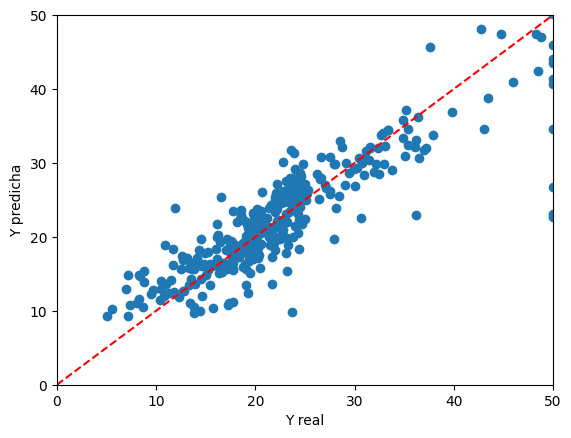

In [61]:
#6c
plt.scatter(Y, Y_pred)
plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel("Y real")
plt.ylabel("Y predicha")
plt.plot([0,50],[0,50], "r--")
#ya no hay curva, pero siguen estando los "outliers" del 50.



Text(0, 0.5, 'Error')

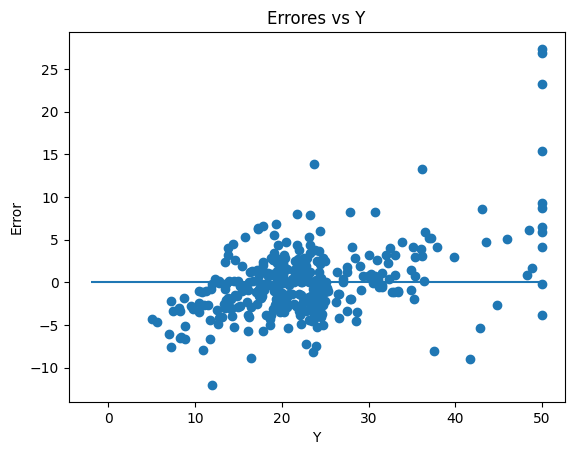

In [62]:
error=Y-Y_pred
plt.scatter(Y, error)
plt.hlines(0,-2,50)
plt.title("Errores vs Y")
plt.xlabel("Y")
plt.ylabel("Error")

7. Haz todas las pruebas que se te ocurran para obtener la mejor regresión lineal posible.

Aqui podriamos:
* Coger todas las variables
* Hacer el polinomio de grado 3 de todas las variables con interacción
* Hacer un modelo y mirar los p-valores. Quitar las variables con p-valores mayores que 0.05
* Re-hacer el modelo con las variables significativas

# Solución extra de regresión Lineal con otro paquete de ML

In [64]:
import statsmodels.api as sm
from scipy import stats
# X2 = sm.add_constant(df_train) # esto solo lo pondria si no tendria a columna de 1
# en este paquete no se ajusta el intercept de forma automatica
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1821.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                   8.51e-237
Time:                        13:08:51   Log-Likelihood:                         -978.94
No. Observations:                 333   AIC:                                      1968.
Df Residuals:                     328   BIC:                                      1987.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:
X.drop(columns=['lstat2'])

,lstat,rm,rm2,rm*lstat
0,4.98,6.575,43.230625,32.74350
1,9.14,6.421,41.229241,58.68794
2,2.94,6.998,48.972004,20.57412
3,5.33,7.147,51.079609,38.09351
4,12.43,6.012,36.144144,74.72916
...,...,...,...,...
328,15.10,5.569,31.013761,84.09190
329,9.67,6.593,43.467649,63.75431
330,9.08,6.120,37.454400,55.56960
331,5.64,6.976,48.664576,39.34464


In [68]:
est = sm.OLS(Y, X.drop(columns=['lstat2']))
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              2280.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                   2.13e-238
Time:                        13:09:16   Log-Likelihood:                         -979.19
No. Observations:                 333   AIC:                                      1966.
Df Residuals:                     329   BIC:                                      1982.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------